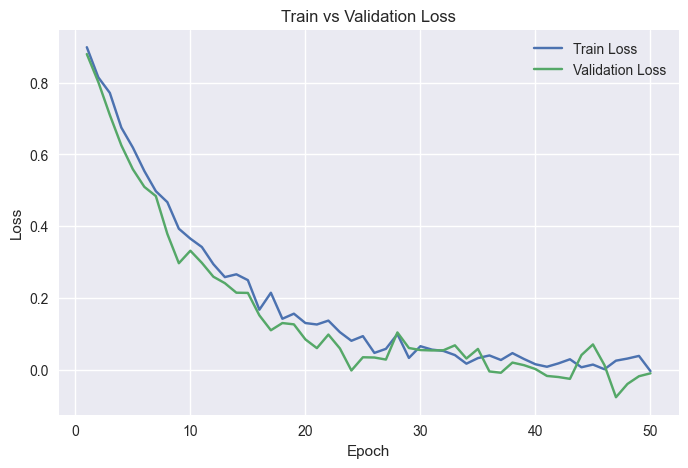

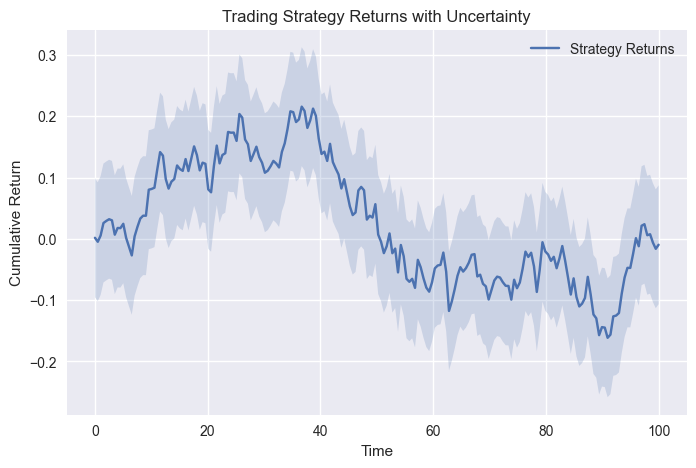

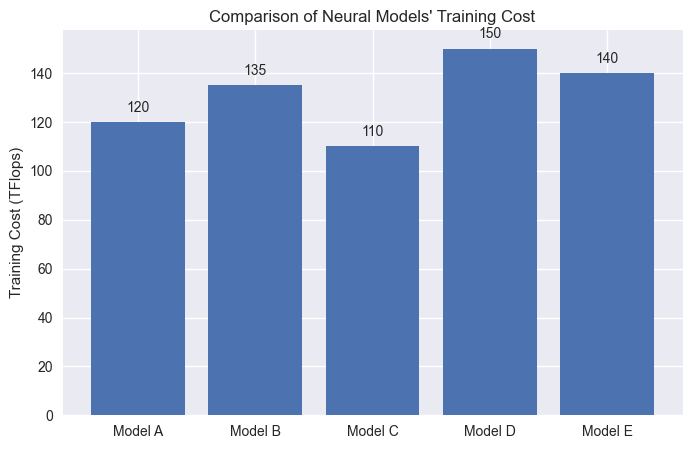

: 

In [ ]:
# plot_styleguide.ipynb

import numpy as np
import matplotlib.pyplot as plt

# Set general plotting style
plt.rcParams.update(plt.rcParamsDefault)
plt.style.use('seaborn-v0_8')



# Mock data
epochs = np.arange(1, 51)
train_loss = np.exp(-epochs/10) + np.random.normal(0, 0.02, size=50)
val_loss = np.exp(-epochs/9) + np.random.normal(0, 0.03, size=50)

# Train vs Validation Loss Plot
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, label='Train Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss')
plt.legend()
plt.show()

# Mock data for returns with uncertainty
time = np.linspace(0, 100, 200)
returns = np.cumsum(np.random.normal(0.001, 0.02, size=200))
uncertainty = np.std(returns) * np.ones_like(returns)

# Trading Strategy Returns Plot with Uncertainty
plt.figure(figsize=(8, 5))
plt.plot(time, returns, label='Strategy Returns')
plt.fill_between(time, returns - uncertainty, returns + uncertainty, alpha=0.2)
plt.xlabel('Time')
plt.ylabel('Cumulative Return')
plt.title('Trading Strategy Returns with Uncertainty')
plt.legend()
plt.show()

# Mock data for model training cost
models = ['Model A', 'Model B', 'Model C', 'Model D', 'Model E']
costs = [120, 135, 110, 150, 140]  # TFlops

# Clustered Bar Chart
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(models, costs)
ax.set_ylabel('Training Cost (TFlops)')
ax.set_title('Comparison of Neural Models\' Training Cost')

# Annotate bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, yval + 3, f'{yval}', ha='center', va='bottom')

plt.show()